In [82]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

1. Загрузить данные из папки Data Folder

In [83]:
data = pd.read_table('flag.data', sep=',', header=None)

data.columns = ['country', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

data.head()

,country,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


2. Провести описательный анализ предложенных данных

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
country       194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [85]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


3. Предложить стратегию по работе с категориальными переменными 

In [86]:
data["religion"].value_counts()
#0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
country_cat = data["country"]
country_cat_encoded = encoder.fit_transform(country_cat)
country_cat_encoded

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 183, 17

In [88]:
data["country"] = country_cat_encoded

In [89]:
data["country"].head()

0    0
1    1
2    2
3    3
4    4
Name: country, dtype: int64

In [90]:
data["mainhue"].value_counts()

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64

In [91]:
#меняем значение в датасете

def mainhue_count(row):
    if 'white' in row['mainhue']:
        return 1
    if 'red' in row['mainhue']:
        return 2
    if 'blue' in row['mainhue']:
        return 3
    if 'green' in row['mainhue']:
        return 4
    if 'gold' in row['mainhue']:
        return 5
    if 'orange' in row['mainhue']:
        return 6
    if 'brown' in row['mainhue']:
        return 7
    else:
        return 0

data['mainhue'] = data.apply(mainhue_count, axis=1)
data['mainhue'].value_counts()

2    71
3    40
4    31
1    22
5    19
0     5
6     4
7     2
Name: mainhue, dtype: int64

Например, следующие атрибуты можно удалить, т.к. они фактически дублируют присвоенное значение mainhue (predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue): topleft - non-null object, botright - non-null object

In [92]:
data = data.drop("topleft", axis=1) 
data = data.drop("botright", axis=1)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 28 columns):
country       194 non-null int64
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null int64
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
text

4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

In [94]:
corr_matrix = data.corr()
corr_matrix

,country,landmass,zone,area,population,language,religion,bars,stripes,colours,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
country,1.000000,0.170270,-0.087289,-0.006473,-0.026453,0.137082,0.050569,-0.025418,0.097415,0.050962,...,-0.086189,-0.000359,-0.029187,0.069763,0.047556,0.066265,0.066614,-0.001165,-0.080039,-0.058889
landmass,0.170270,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,...,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743
zone,-0.087289,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,...,-0.042542,0.101441,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602
area,-0.006473,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,...,-0.005652,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423
population,-0.026453,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,...,0.051257,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194
language,0.137082,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,...,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977
religion,0.050569,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,...,0.123260,-0.225238,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158
bars,-0.025418,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,...,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709
stripes,0.097415,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,...,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564
colours,0.050962,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,...,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483


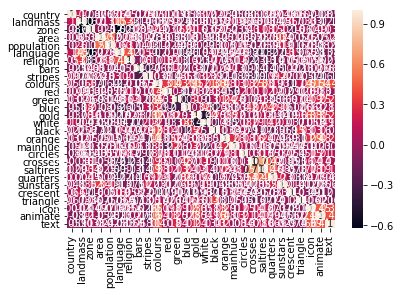

In [95]:
sns.heatmap(corr_matrix, annot=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

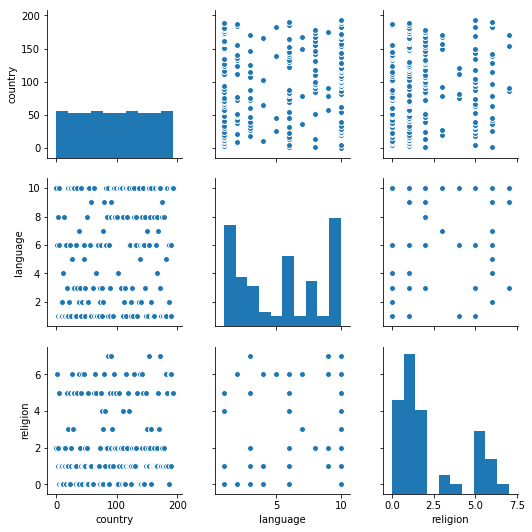

In [96]:
sns.pairplot(data, vars=['country', 'language', 'religion'],
                 kind='scatter')

In [97]:
corr_matrix = data.corr()
corr_matrix["religion"].sort_values(ascending=False)

religion      1.000000
language      0.422315
landmass      0.325073
population    0.172731
green         0.128843
circles       0.123260
red           0.121721
stripes       0.103222
area          0.087941
black         0.074055
triangle      0.056868
icon          0.055714
crescent      0.053145
country       0.050569
gold          0.023334
mainhue       0.016005
animate      -0.002741
colours      -0.017720
orange       -0.051215
text         -0.055158
bars         -0.060000
sunstars     -0.075081
saltires     -0.133373
quarters     -0.135713
blue         -0.154891
white        -0.167605
crosses      -0.225238
zone         -0.320537
Name: religion, dtype: float64

In [98]:
#выберем наиболее значимые параметры для анализа 
data_r = data[['religion', 'language', 'landmass', 'population', 'green', 'circles', 'red', 'stripes', 'area', 'black', 'triangle', 'icon', 'crescent', 'country', 'gold', 'mainhue',]]

In [99]:
corr_matrix_r = data_r.corr()
corr_matrix_r

,religion,language,landmass,population,green,circles,red,stripes,area,black,triangle,icon,crescent,country,gold,mainhue
religion,1.000000,0.422315,0.325073,0.172731,0.128843,0.123260,0.121721,0.103222,0.087941,0.074055,0.056868,0.055714,0.053145,0.050569,0.023334,0.016005
language,0.422315,1.000000,0.496400,0.062804,0.006046,0.098476,-0.011048,0.105409,-0.027869,0.094465,-0.064845,0.028336,0.193375,0.137082,-0.189429,0.045945
landmass,0.325073,0.496400,1.000000,0.105940,0.026226,0.065696,0.093400,-0.063375,0.013279,-0.058243,-0.033154,0.030359,0.168438,0.170270,-0.080465,0.090220
population,0.172731,0.062804,0.105940,1.000000,-0.047918,0.051257,-0.024648,0.030100,0.519030,-0.103552,-0.078156,0.017966,-0.015544,-0.026453,-0.002184,0.014647
green,0.128843,0.006046,0.026226,-0.047918,1.000000,0.011643,0.031169,-0.085367,-0.081328,0.107461,0.039840,0.190550,-0.007137,0.033476,0.192788,0.255915
circles,0.123260,0.098476,0.065696,0.051257,0.011643,1.000000,0.108639,-0.087479,-0.005652,0.079483,-0.051356,0.145507,0.054474,-0.086189,0.011643,0.145185
red,0.121721,-0.011048,0.093400,-0.024648,0.031169,0.108639,1.000000,0.014210,-0.005470,0.142230,0.025760,0.097513,-0.091458,-0.001916,0.081769,-0.216258
stripes,0.103222,0.105409,-0.063375,0.030100,-0.085367,-0.087479,0.014210,1.000000,0.028454,0.091814,-0.005719,-0.107426,-0.010242,0.097415,-0.031987,-0.082564
area,0.087941,-0.027869,0.013279,0.519030,-0.081328,-0.005652,-0.005470,0.028454,1.000000,-0.119825,-0.075366,0.026593,-0.005049,-0.006473,0.014500,-0.023427
black,0.074055,0.094465,-0.058243,-0.103552,0.107461,0.079483,0.142230,0.091814,-0.119825,1.000000,0.328242,0.130330,-0.148364,0.021611,0.247378,0.042027


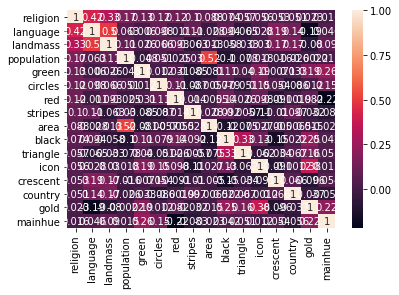

In [100]:
sns.heatmap(corr_matrix_r, annot=True,
            xticklabels=corr_matrix_r.columns.values,
            yticklabels=corr_matrix_r.columns.values)

5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

In [101]:
y = data['religion']
y.head()

0    2
1    6
2    2
3    1
4    0
Name: religion, dtype: int64

In [102]:
Ydummy = pd.get_dummies( y )
Ydummy.head()

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [103]:
# столбец religion является целевой переменной, удаляем его из X
X = data.drop("religion", axis=1) 
X.head()

,country,landmass,zone,area,population,language,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,0,5,1,648,16,10,0,3,5,1,...,0,0,0,0,1,0,0,1,0,0
1,1,3,1,29,3,6,0,0,3,1,...,0,0,0,0,1,0,0,0,1,0
2,2,4,1,2388,20,8,2,0,3,1,...,0,0,0,0,1,1,0,0,0,0
3,3,6,3,0,0,1,0,0,5,1,...,0,0,0,0,0,0,1,1,1,0
4,4,3,1,0,0,6,3,0,3,1,...,0,0,0,0,0,0,0,0,0,0


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
#Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42 )

In [106]:
X_train.shape

(135, 27)

In [107]:
X_test.shape

(59, 27)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
model = LogisticRegression()

In [110]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
#Получаем прогнозные значения модели (переменная predictions)
predictions = model.predict_proba(X_test)

In [112]:
for line in zip( predictions[:, 1], y_test ):
    print( line )

(0.16480307806561212, 6)
(0.012136538076109366, 0)
(0.20254094736088782, 2)
(0.0331059876703087, 6)
(0.03779958007689892, 1)
(0.8258433747746676, 1)
(0.6317675923139995, 1)
(0.13013876872920735, 1)
(0.3261165634657887, 0)
(0.2405944158187041, 4)
(0.17164171198603778, 6)
(0.08679066943229147, 5)
(0.007203960427375998, 2)
(0.3100740420144462, 0)
(0.0723303535506047, 1)
(0.32686202599734704, 2)
(0.3414636575575975, 1)
(0.10939194175905674, 1)
(0.4257519049030032, 5)
(0.08863435098835869, 1)
(0.8717604682371625, 1)
(0.16677048300089117, 0)
(0.3185834059306539, 5)
(0.3952993207932784, 6)
(0.8643147951350535, 1)
(0.02513107164570087, 6)
(0.4574899286197988, 1)
(0.014321984889777565, 5)
(0.0343967512051184, 1)
(0.15522235911342705, 0)
(0.08059085906843759, 5)
(0.6552002930666266, 4)
(0.8728359651337152, 1)
(0.2800304147325574, 1)
(0.8443262011129886, 1)
(0.5233908757913265, 5)
(0.8138616047944426, 1)
(0.08931610562264346, 3)
(0.060756207497133084, 2)
(0.05261695993945152, 5)
(0.61831871883292

In [113]:
model.score(X_test, y_test)

0.4406779661016949

In [114]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [115]:
params = [ {'max_depth': list( range(1, 20) )} ]

In [116]:
gs = GridSearchCV( DecisionTreeClassifier(), param_grid = params, scoring = 'accuracy', return_train_score = False )

In [117]:
gs.fit( X, Ydummy )

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [118]:
gs.cv_results_

{'mean_fit_time': array([0.00254663, 0.00167298, 0.00172226, 0.00161624, 0.00176342,
        0.00178266, 0.00190457, 0.00189392, 0.00197887, 0.00218534,
        0.00353241, 0.00297546, 0.00402427, 0.00203355, 0.00220998,
        0.00177868, 0.00174403, 0.00176334, 0.00181333]),
 'std_fit_time': array([1.30986847e-03, 1.42908953e-04, 1.38866673e-04, 7.62141824e-05,
        4.98294197e-05, 6.55256499e-05, 4.60957658e-05, 5.81911762e-05,
        5.35527970e-05, 3.15096469e-04, 5.07475985e-04, 4.99273818e-04,
        7.61159171e-05, 1.58262812e-04, 2.49510584e-04, 5.95993463e-06,
        9.05465509e-05, 1.22872957e-04, 1.00077948e-04]),
 'mean_score_time': array([0.00166853, 0.0008808 , 0.00088437, 0.00078432, 0.00082556,
        0.0009373 , 0.00086951, 0.00089582, 0.00089073, 0.00112263,
        0.00164938, 0.00161521, 0.00168506, 0.00088294, 0.00084233,
        0.00074363, 0.00077311, 0.00074863, 0.00082493]),
 'std_score_time': array([9.93564460e-04, 1.11850815e-05, 5.35536225e-05, 1.21

In [119]:
gs.best_params_

{'max_depth': 13}

In [120]:
#тогда зададим 'max_depth': [5]

In [121]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

In [122]:
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, tree_params, scoring='accuracy', cv=10)
grid_tree.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5], 'min_samples_leaf': [1, 2, 4, 8, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

9. Рассчитать Feature Importances для переменных модели

In [123]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)
print(grid_tree.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8}
0.6074074074074074
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


11. Построить Confusion Matrix для ваших результатов

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
y_pred = gs.best_estimator_.predict(X_test)

In [126]:
confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага 

In [127]:
data["religion"].value_counts()
#0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

In [128]:
#выберем наиболее значимые параметры для анализа по деталям флага
data_flag = data[['religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue',
                'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate',
                'text']]

In [129]:
data_flag['religion'].head()

0    2
1    6
2    2
3    1
4    0
Name: religion, dtype: int64

In [130]:
#  выберем из датасета две наиболее распространённые релилии для реализации бинарной классификации - возможность верно предсказать выбор из 2х религий
data_flag = data_flag.drop(data_flag[(data_flag.religion != 1) & (data_flag.religion != 0)].index)

In [131]:
data_flag['religion'].value_counts()

1    60
0    40
Name: religion, dtype: int64

In [132]:
data_flag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 3 to 189
Data columns (total 22 columns):
religion    100 non-null int64
bars        100 non-null int64
stripes     100 non-null int64
colours     100 non-null int64
red         100 non-null int64
green       100 non-null int64
blue        100 non-null int64
gold        100 non-null int64
white       100 non-null int64
black       100 non-null int64
orange      100 non-null int64
mainhue     100 non-null int64
circles     100 non-null int64
crosses     100 non-null int64
saltires    100 non-null int64
quarters    100 non-null int64
sunstars    100 non-null int64
crescent    100 non-null int64
triangle    100 non-null int64
icon        100 non-null int64
animate     100 non-null int64
text        100 non-null int64
dtypes: int64(22)
memory usage: 18.0 KB


In [133]:
y_flag = data_flag['religion']
X_flag = data_flag.drop("religion", axis=1) 
X_flag.head()

,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
3,0,0,5,1,0,1,1,1,0,1,...,0,0,0,0,0,0,1,1,1,0
4,3,0,3,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,3,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
7,0,1,5,1,0,1,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0
8,0,3,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
 #нормировка значений
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_flag_normalized = preprocessing.normalize(X_flag, norm='l2')

X_flag_normalized

array([[0.        , 0.        , 0.77151675, ..., 0.15430335, 0.15430335,
        0.        ],
       [0.44232587, 0.        , 0.44232587, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25819889, 0.77459667, ..., 0.        , 0.25819889,
        0.        ],
       ...,
       [0.28284271, 0.        , 0.56568542, ..., 0.14142136, 0.        ,
        0.        ],
       [0.        , 0.27386128, 0.63900965, ..., 0.09128709, 0.09128709,
        0.        ],
       [0.        , 0.        , 0.46291005, ..., 0.        , 0.        ,
        0.        ]])

In [160]:
scaler = StandardScaler()
scaler.fit(X_flag)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [162]:
X_flag_imputed_scaled = scaler.transform(X_flag)
X_flag_imputed_scaled = pd.DataFrame(X_flag_imputed_scaled)

In [163]:
X_flag_imputed_scaled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.440089,-0.603906,0.931328,0.561951,-0.733799,0.685994,0.941697,0.484322,-0.546536,2.380476,...,-0.386556,-0.569652,-0.436436,-0.421965,-0.320735,0.0,2.586949,1.687055,1.829707,-0.314485
1,2.310469,-0.603906,-0.418423,0.561951,-0.733799,0.685994,0.941697,-2.064742,-0.546536,-0.420084,...,-0.386556,-0.569652,-0.436436,-0.421965,-0.320735,0.0,-0.386556,-0.592749,-0.546536,-0.314485
2,-0.440089,-0.146401,-0.418423,-1.779513,-0.733799,0.685994,-1.061913,0.484322,-0.546536,2.380476,...,-0.386556,-0.569652,-0.436436,-0.421965,-0.320735,0.0,-0.386556,-0.592749,1.829707,-0.314485
3,-0.440089,-0.146401,0.931328,0.561951,-0.733799,0.685994,0.941697,0.484322,1.829707,-0.420084,...,-0.386556,-0.569652,-0.436436,-0.421965,-0.149219,0.0,2.586949,-0.592749,-0.546536,-0.314485
4,-0.440089,0.768607,-1.093298,-1.779513,-0.733799,0.685994,-1.061913,0.484322,-0.546536,-0.420084,...,-0.386556,-0.569652,-0.436436,-0.421965,-0.320735,0.0,-0.386556,-0.592749,-0.546536,-0.314485
5,-0.440089,0.768607,-0.418423,-1.779513,-0.733799,0.685994,0.941697,0.484322,-0.546536,-0.420084,...,-0.386556,-0.569652,-0.436436,-0.421965,-0.149219,0.0,-0.386556,-0.592749,-0.546536,-0.314485
6,-0.440089,-0.603906,-0.418423,0.561951,-0.733799,0.685994,-1.061913,0.484322,-0.546536,-0.420084,...,-0.386556,1.464819,2.291288,1.412666,0.708361,0.0,-0.386556,-0.592749,-0.546536,-0.314485
7,-0.440089,0.768607,-1.093298,0.561951,-0.733799,-1.457738,-1.061913,0.484322,-0.546536,-0.420084,...,-0.386556,-0.569652,-0.436436,-0.421965,-0.320735,0.0,-0.386556,-0.592749,-0.546536,-0.314485
8,-0.440089,0.768607,-0.418423,-1.779513,-0.733799,0.685994,0.941697,-2.064742,1.829707,-0.420084,...,-0.386556,-0.569652,-0.436436,-0.421965,-0.320735,0.0,2.586949,-0.592749,-0.546536,-0.314485
9,2.310469,-0.603906,-0.418423,-1.779513,-0.733799,0.685994,0.941697,-2.064742,1.829707,-0.420084,...,-0.386556,-0.569652,-0.436436,-0.421965,-0.320735,0.0,-0.386556,1.687055,-0.546536,-0.314485


In [164]:
#Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30
X_flag_train, X_flag_test, y_flag_train, y_flag_test = train_test_split( X_flag_imputed_scaled, y_flag, test_size = 0.3, random_state = 42 )

In [165]:
model = LogisticRegression()

In [166]:
# обучаем модель

model.fit( X_flag, y_flag )
predictions = model.predict_proba( X_flag_test )

In [167]:
predictions[:5]

array([[0.53238768, 0.46761232],
       [0.88977596, 0.11022404],
       [0.89224993, 0.10775007],
       [0.91709403, 0.08290597],
       [0.87354694, 0.12645306]])

In [168]:
model.score(X_flag, y_flag)

0.78

In [169]:
model.fit(X_flag_train, y_flag_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
model.score(X_flag_train, y_flag_train)

0.8

10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

# Accuracy

In [103]:
from sklearn.metrics import accuracy_score

In [172]:
clf = LogisticRegression(C=gs.best_params_)

In [173]:
clf.fit(X_train, y_train)

ValueError: Penalty term must be positive; got (C={'max_depth': 13})

In [174]:
y_test_pred = clf.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [175]:
accuracy_score(y_test, y_test_pred)

NameError: name 'accuracy_score' is not defined

# Precision, Recall

In [108]:
from sklearn.metrics import precision_recall_curve

In [132]:
pr, re = precision_recall_curve( y_test, predictions[:,1] )

ValueError: multiclass format is not supported

In [45]:
# наглядно сопоставим результаты
for line in zip( pr, re, thres ):
    print( line )

NameError: name 'pr' is not defined

In [ ]:
%pylab inline

In [ ]:
plt.plot( re, pr )

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

# f1_score

In [159]:
from sklearn.metrics import f1_score

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

In [ ]:
#F1 = 2 * (precision * recall) / (precision + recall)

# ROC

In [47]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [48]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

ValueError: multiclass format is not supported

In [49]:
for line in zip( fpr, tpr, thres ):
    print( line )

NameError: name 'fpr' is not defined

In [50]:
plt.plot( fpr, tpr )

NameError: name 'fpr' is not defined

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score( y_test, predictions[:, 1] )

ValueError: multiclass format is not supported

In [53]:
from sklearn.metrics import auc

In [156]:
auc( fpr, tpr )

NameError: name 'auc' is not defined

In [ ]:
9. Рассчитать Feature Importances для переменных модели

In [ ]:
est = smf.ols('sales ~ TV + radio + newspaper', adv_df).fit()
est_res = est.summary()
est_res.tables[1]